# PA 2: Classification - Decision Tree

## Student Details

Student Name and ID of the member submitting the assignment: 

Student Name and ID of the remaining members: 

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
*10 points per question will be deducted incase you fail to do so*
<br>*DO NOT DELETE THIS CELL*<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn


## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

**Do not upload the database file. Only two files are expected** [-20 points]


## Programming Assignment Details (5 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Drinking Water dataset from water_potability.csv. Output/Prediction variable is potability.  [1 points]


2) Create a dataframe and print the first and last 10 records of your dataset.  [1 points]

3) Print the class labels.  [1 points]


4) Split your dataset 70% for training,20% for validation and 10% for testing the classifier. Use random state 2030.  [2 points]

# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support.Explain the classification report in detail and donot copy paste from the internet.**10 points will be deducted if found** [2 points]


4) Print the decision tree visualization with 3 different  depths of 4 and also mention the difference you observe.  [5 points]


# Naive Bayes (10 Points)


1) Use 3 types of Naive bayes classifier  to predict the data and explain which is the best classifier.[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]

## Report (23 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [4 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!

## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

In [12]:
#importing the required modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [13]:
df = pd.read_csv('Gender_classifier.csv', encoding='latin1')

In [14]:
# getting first 10 rows of a dataset
result = df.head(10)
result

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 01:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 01:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 01:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 01:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.590000e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.590000e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 01:52,female,1.0000,yes,1.0,9/8/15 04:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.590000e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 01:49,female,1.0000,yes,1.0,5/13/11 03:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.590000e+17,"Nottingham, England.",Amsterdam


In [15]:
# Last 10 rows of a dataset
result2 = df.tail(10)
result2

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20040,815756417,True,golden,253,NaN,male,0.8472,yes,1.0,8/16/13 14:48,...,https://pbs.twimg.com/profile_images/557215663...,0,0,Discovered it in England. It's how they eat fi...,NaN,3084,10/26/15 13:19,6.590000e+17,"Houston, Texas",Central Time (US & Canada)
20041,815756542,True,golden,252,NaN,brand,1.0000,yes,1.0,8/11/11 10:01,...,https://pbs.twimg.com/profile_images/149016810...,0,C0DEED,For Stan and Lisa... has #Coffee Cup at https:...,NaN,105864,10/26/15 13:19,6.590000e+17,Colorado,Mountain Time (US & Canada)
20042,815756642,True,golden,212,NaN,brand,0.6364,yes,1.0,6/8/14 19:07,...,https://pbs.twimg.com/profile_images/616770699...,0,948C75,Best Bloody Mary Brunch at the #NYCWFF @nyceff...,NaN,5900,10/26/15 12:40,6.590000e+17,"Miami, FL",Eastern Time (US & Canada)
20043,815756700,True,golden,240,NaN,male,1.0000,yes,1.0,9/27/11 00:19,...,https://pbs.twimg.com/profile_images/378800000...,1,5ED4DC,"Game faggot and venison loin, crisp spelt and ...",NaN,8193,10/26/15 13:19,6.590000e+17,Chertsey Bridge,NaN
20044,815756767,True,golden,227,NaN,female,1.0000,yes,1.0,6/11/14 01:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/15 13:19,6.590000e+17,NaN,NaN
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.590000e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.590000e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 01:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.590000e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.590000e+17,Texas Hill Country,NaN
20049,815757985,True,golden,249,NaN,female,1.0000,yes,1.0,4/14/14 17:22,...,https://pbs.twimg.com/profile_images/655134724...,0,C0DEED,I think for my APUSH creative project I'm goin...,NaN,2922,10/26/15 13:19,6.590000e+17,NaN,NaN


In [16]:
# datatypes of a dataframe
df.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

In [17]:
#column names of dataser
for col in df.columns:
    print(col)

_unit_id
_golden
_unit_state
_trusted_judgments
_last_judgment_at
gender
gender:confidence
profile_yn
profile_yn:confidence
created
description
fav_number
gender_gold
link_color
name
profile_yn_gold
profileimage
retweet_count
sidebar_color
text
tweet_coord
tweet_count
tweet_created
tweet_id
tweet_location
user_timezone


In [18]:
# class label
print (df["gender"])

0          male
1          male
2          male
3          male
4        female
          ...  
20045    female
20046      male
20047      male
20048    female
20049    female
Name: gender, Length: 20050, dtype: object


In [19]:
# finding the sum of all nan values in the dataset
df.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                       0
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [20]:
#dropping Nan
df.dropna(inplace=True)

In [21]:
train_size=0.7
X = df. drop(columns = ['gender']). copy()
y = df['gender']
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7, random_state = 2030,)
#(X Train, y train) 70% of dataset (X rem) 30% of dataset
#IN 30% split %10 percent for test remiaing for validation
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.1)
print (X_train.shape), print (y_train.shape)
print (X_valid. shape), print (y_valid.shape)
print (X_test.shape), print(y_test.shape)

ValueError: With n_samples=0, test_size=None and train_size=0.7, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## Decision Tree

In [ ]:
#Gini index
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
 # Creating the classifier object
clf = DecisionTreeClassifier (criterion="gini",max_depth=4)

In [ ]:
#classification fit in the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
# getting accuracy score from metrics accuracy_score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.5573770491803278


In [ ]:
#printing the classification report and confusion matrix
from sklearn.metrics import classification_report
print("Report : ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.62      0.76      0.68        38
           1       0.36      0.22      0.27        23

    accuracy                           0.56        61
   macro avg       0.49      0.49      0.48        61
weighted avg       0.52      0.56      0.53        61

Confusion Matrix:  [[29  9]
 [18  5]]


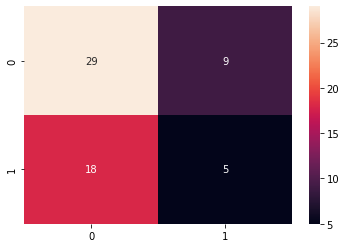

In [ ]:
#confusion matrix using seaborn 
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
f = sns.heatmap(cm, annot= True, fmt='d')

[Text(0.5, 0.875, 'X[4] <= 260.92\ngini = 0.48\nsamples = 1407\nvalue = [844, 563]'),
 Text(0.25, 0.625, 'X[2] <= 18346.617\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.125, 0.375, 'X[4] <= 232.093\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.0625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1875, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.375, 0.375, 'X[4] <= 239.985\ngini = 0.255\nsamples = 40\nvalue = [6, 34]'),
 Text(0.3125, 0.125, 'gini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.75, 0.625, 'X[4] <= 387.301\ngini = 0.475\nsamples = 1352\nvalue = [827, 525]'),
 Text(0.625, 0.375, 'X[0] <= 5.609\ngini = 0.465\nsamples = 1223\nvalue = [773, 450]'),
 Text(0.5625, 0.125, 'gini = 0.374\nsamples = 193\nvalue = [145, 48]'),
 Text(0.6875, 0.125, 'gini = 0.476\nsamples = 1030\nvalue = [628, 402]'),
 Text(0.875, 0.375, 'X[0] <= 7.621\ngini = 0.487\nsamples = 129\

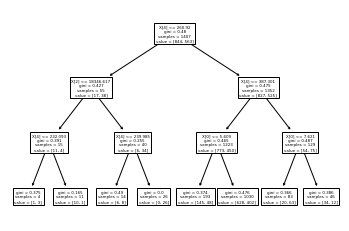

In [ ]:
# Using gini with maxdepth =3 plotting decision tree
from sklearn import tree
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier(max_depth = 3, criterion='gini')
clf.fit(X_train, y_train)
clf.predict(X_test)
tree.plot_tree(clf)

In [ ]:
# Entropy
clf1=DecisionTreeClassifier(criterion = "entropy",max_depth=4)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred=clf1.predict(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
print(score)

0.5573770491803278


In [ ]:
from sklearn.metrics import classification_report
print("Report : ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.62      0.76      0.68        38
           1       0.36      0.22      0.27        23

    accuracy                           0.56        61
   macro avg       0.49      0.49      0.48        61
weighted avg       0.52      0.56      0.53        61

Confusion Matrix:  [[29  9]
 [18  5]]


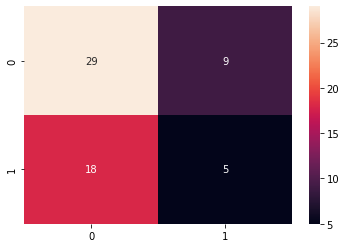

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
f = sns.heatmap(cm, annot= True, fmt='d')

[Text(0.5, 0.875, 'X[4] <= 260.92\nentropy = 0.971\nsamples = 1407\nvalue = [844, 563]'),
 Text(0.25, 0.625, 'X[2] <= 21075.407\nentropy = 0.892\nsamples = 55\nvalue = [17, 38]'),
 Text(0.125, 0.375, 'X[0] <= 7.947\nentropy = 0.934\nsamples = 20\nvalue = [13, 7]'),
 Text(0.0625, 0.125, 'entropy = 0.696\nsamples = 16\nvalue = [13, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.375, 'X[4] <= 239.985\nentropy = 0.513\nsamples = 35\nvalue = [4, 31]'),
 Text(0.3125, 0.125, 'entropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.75, 0.625, 'X[4] <= 387.301\nentropy = 0.964\nsamples = 1352\nvalue = [827, 525]'),
 Text(0.625, 0.375, 'X[0] <= 5.609\nentropy = 0.949\nsamples = 1223\nvalue = [773, 450]'),
 Text(0.5625, 0.125, 'entropy = 0.809\nsamples = 193\nvalue = [145, 48]'),
 Text(0.6875, 0.125, 'entropy = 0.965\nsamples = 1030\nvalue = [628, 402]'),
 Text(0.875, 0.375, 'X[0] <= 7

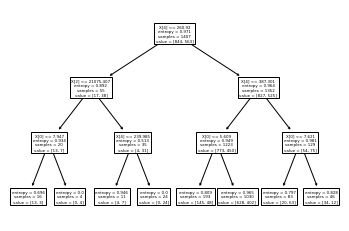

In [ ]:
# Using entropy with maxdepth =3 plotting decision tree
clf = DecisionTreeClassifier(max_depth = 3, criterion='entropy')
clf.fit(X_train, y_train)
clf.predict(X_test)
tree.plot_tree(clf)

[Text(0.5, 0.8333333333333334, 'X[4] <= 260.92\ngini = 0.48\nsamples = 1407\nvalue = [844, 563]'),
 Text(0.25, 0.5, 'X[2] <= 18346.617\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.255\nsamples = 40\nvalue = [6, 34]'),
 Text(0.75, 0.5, 'X[4] <= 387.301\ngini = 0.475\nsamples = 1352\nvalue = [827, 525]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.465\nsamples = 1223\nvalue = [773, 450]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.487\nsamples = 129\nvalue = [54, 75]')]

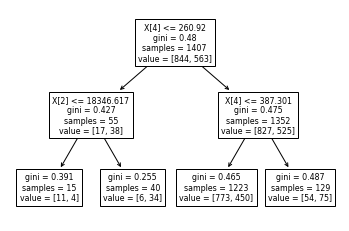

In [ ]:
# Using gini with maxdepth =2 plotting decision tree
from sklearn import tree
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, y_train)
clf.predict(X_test)
tree.plot_tree(clf)

[Text(0.5, 0.875, 'X[4] <= 260.92\ngini = 0.48\nsamples = 1407\nvalue = [844, 563]'),
 Text(0.25, 0.625, 'X[2] <= 18346.617\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.125, 0.375, 'X[4] <= 232.093\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.0625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1875, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.375, 0.375, 'X[4] <= 239.985\ngini = 0.255\nsamples = 40\nvalue = [6, 34]'),
 Text(0.3125, 0.125, 'gini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.75, 0.625, 'X[4] <= 387.301\ngini = 0.475\nsamples = 1352\nvalue = [827, 525]'),
 Text(0.625, 0.375, 'X[0] <= 5.609\ngini = 0.465\nsamples = 1223\nvalue = [773, 450]'),
 Text(0.5625, 0.125, 'gini = 0.374\nsamples = 193\nvalue = [145, 48]'),
 Text(0.6875, 0.125, 'gini = 0.476\nsamples = 1030\nvalue = [628, 402]'),
 Text(0.875, 0.375, 'X[0] <= 7.621\ngini = 0.487\nsamples = 129\

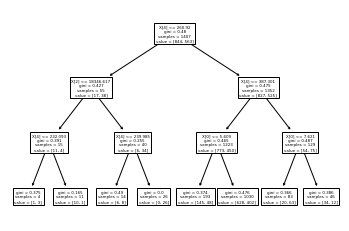

In [ ]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)
clf.predict(X_test)
tree.plot_tree(clf)

[Text(0.49107142857142855, 0.9, 'X[4] <= 260.92\ngini = 0.48\nsamples = 1407\nvalue = [844, 563]'),
 Text(0.26785714285714285, 0.7, 'X[2] <= 18346.617\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.14285714285714285, 0.5, 'X[4] <= 232.093\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.07142857142857142, 0.3, 'X[2] <= 8633.077\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.21428571428571427, 0.3, 'X[0] <= 8.262\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.39285714285714285, 0.5, 'X[4] <= 239.985\ngini = 0.255\nsamples = 40\nvalue = [6, 34]'),
 Text(0.35714285714285715, 0.3, 'X[3] <= 6.683\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.32142857142857145, 0.1,

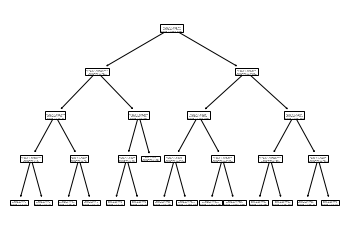

In [ ]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)
clf.predict(X_test)
tree.plot_tree(clf)

## Naive Bayes

Gaussian Naive Bayes

In [ ]:
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = Gnb.predict(X_test)

Report :                precision    recall  f1-score   support

           0       0.63      0.97      0.76        38
           1       0.50      0.04      0.08        23

    accuracy                           0.62        61
   macro avg       0.56      0.51      0.42        61
weighted avg       0.58      0.62      0.51        61

Confusion Matrix:  [[37  1]
 [22  1]]


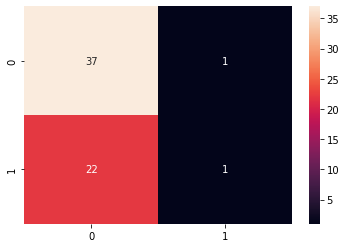

In [ ]:
#getting classification report and confusion matrix for the Gaussian 
from sklearn.metrics import classification_report
print("Report : ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
f = sns.heatmap(cm, annot= True, fmt='d')

Multinomial Naive Bayes

In [ ]:
Mnb = MultinomialNB()
Mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = Mnb.predict(X_test)

Report :                precision    recall  f1-score   support

           0       0.59      0.50      0.54        38
           1       0.34      0.43      0.38        23

    accuracy                           0.48        61
   macro avg       0.47      0.47      0.46        61
weighted avg       0.50      0.48      0.48        61

Confusion Matrix:  [[19 19]
 [13 10]]


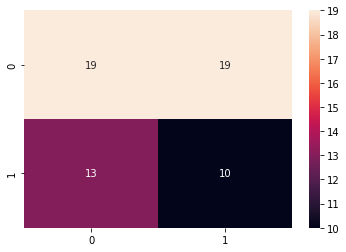

In [ ]:
#getting classification report and confusion matrix for the Multinomial
from sklearn.metrics import classification_report
print("Report : ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
f = sns.heatmap(cm, annot= True, fmt='d')

Bernoulli Naive Bayes

In [ ]:
Bnb = BernoulliNB()
Bnb.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred = Bnb.predict(X_test)


y_pred_val = Bnb.predict(x_val_txt)

Report :                precision    recall  f1-score   support

           0       0.62      1.00      0.77        38
           1       0.00      0.00      0.00        23

    accuracy                           0.62        61
   macro avg       0.31      0.50      0.38        61
weighted avg       0.39      0.62      0.48        61

Confusion Matrix:  [[38  0]
 [23  0]]


C:\Users\bhara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

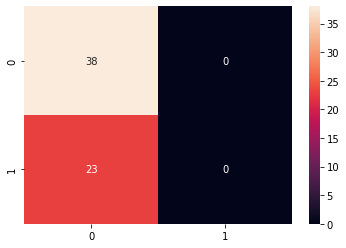

In [ ]:
#getting classification report and confusion matrix for the bernoulli
from sklearn.metrics import classification_report
print("Report : ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
f = sns.heatmap(cm, annot= True, fmt='d')